__CUSTOMER CHURN PREDICTION USING MACHINE LEARNING__

__INTRODUCTION__

__CUSTOMER CHURN IS A CRITICAL ISSUE FOR BUSINESSES, ESPECIALLY IN THE TELECOMMUNICATIONS SECTOR, WHERE RETAINING CUSTOMERS IS MORE COST-EFFECTIVE THAN ACQUIRING NEW ONES.
THIS PROJECT AIMS TO PREDICT CUSTOMER CHURN USING MACHINE LEARING MODELS, SPECIFICALLY LOGISTIC REGRESSION, RANDOM FOREST, SVM,KNN AND GRADIENT BOOSTING, TO HELP BUSINESSES TAKE PROACTIVE MEASURES TO REDUCE CHURN RATES.BY ANALYZING CUSTOMER DATA, WE IDENTIFY KEY FACTORS INFLUENCING CHURN AND DETERMINE THE BEST MODEL FOR PREDICTION BASED ON ACCURACY, PRECISION AND F1 SCORE.__

__IMPORT NUMPY AND PANDAS__

In [1]:
import numpy as np

In [3]:
import pandas as pd

__LOAD THE DATASET__

In [4]:
df = pd.read_csv("C:\\Users\\akhik\\Downloads\\customer_data_edited.csv") 

__FRIST FEW ROWS AND BASIC INFORMATION ABOUT THE DATA__

In [8]:
df.head()

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,no,no,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,23383607.0
1,2,MT,137,510,no,no,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,22550362.0
2,3,OH,103,408,no,yes,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,59063354.0
3,4,NM,99,415,no,no,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,25464504.0
4,5,SC,108,415,no,no,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,691824.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   recordID                       12892 non-null  int64  
 1   state                          12892 non-null  object 
 2   account_length                 12892 non-null  int64  
 3   area_code                      12892 non-null  int64  
 4   international_plan             12892 non-null  object 
 5   voice_mail_plan                12892 non-null  object 
 6   number_vmail_messages          12892 non-null  int64  
 7   total_day_minutes              12892 non-null  float64
 8   total_day_calls                12892 non-null  int64  
 9   total_day_charge               12892 non-null  float64
 10  total_eve_minutes              12892 non-null  float64
 11  total_eve_calls                12892 non-null  int64  
 12  total_eve_charge               12892 non-null 

__CHECKING THE DUPLICATE AND MISSING VALUES__

In [13]:
duplicates = df.duplicated().sum()

In [15]:
missing_values = df.isnull().sum()

In [17]:
duplicates

0

In [19]:
missing_values

recordID                         0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
customer_id                      0
dtype: int64

__DROP IRRELEVANT COLUMNS__ 

In [22]:
data_cleaned = df.drop(columns=["recordID", "customer_id"]) 

__ENCODE THE CATEGORICAL VARIABLES__ 

In [25]:
data_cleaned['international_plan'] = data_cleaned['international_plan'].map({'yes': 1, 'no': 0})
data_cleaned['voice_mail_plan'] = data_cleaned['voice_mail_plan'].map({'yes': 1, 'no': 0})
data_cleaned['churn'] = data_cleaned['churn'].map({'yes': 1, 'no': 0})


In [27]:
data_cleaned = pd.get_dummies(data_cleaned, columns=["state"], drop_first=True)

__CHECK THE IMBALANCE IN THE TARGETED VARIABLE__ 

In [30]:
target_distribution = data_cleaned['churn'].value_counts(normalize=True)

In [32]:
print("DUPLICATES VALUES =",duplicates) 

DUPLICATES VALUES = 0


In [34]:
print("MISSING VALUES =",missing_values)

MISSING VALUES = recordID                         0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
customer_id                      0
dtype: int64


In [36]:
print("TARGET DISTRIBUTION =", target_distribution)

TARGET DISTRIBUTION = churn
0    0.858594
1    0.141406
Name: proportion, dtype: float64


__FEATURE SCALING AND SPLITTING__

In [ ]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.preprocessing import StandardScaler

__SEPERATE FEATURES AND TARGET VARIABLE__

In [40]:
X = data_cleaned.drop(columns=["churn"])
y = data_cleaned["churn"]


__SPLIT THE DATASET INTO TRAINING AND TESTING SETS (80-20 SPLIT)__

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__SCALE NUMERICAL FEATURES USING STANDARDSCALER__

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


__VERIFING THE SPLIT AND SCALING__

In [69]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10313, 68) (2579, 68) (10313,) (2579,)


__EXPLORATORY DATA ANALYSIS (EDA)__

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns


__COMBINE TRAINING DATA FOR EDA__

In [73]:
eda_data = X_train.copy()
eda_data["churn"] = y_train


__PLOT THE DISTRIBUTION OF KEY NUMERICAL FEATURES FOR CHURNED VS NON-CHURNED CUSTOMERS__

In [75]:
numerical_features = [
    "account_length",
    "total_day_minutes",
    "total_eve_minutes",
    "total_night_minutes",
    "total_intl_minutes",
    "number_customer_service_calls"]


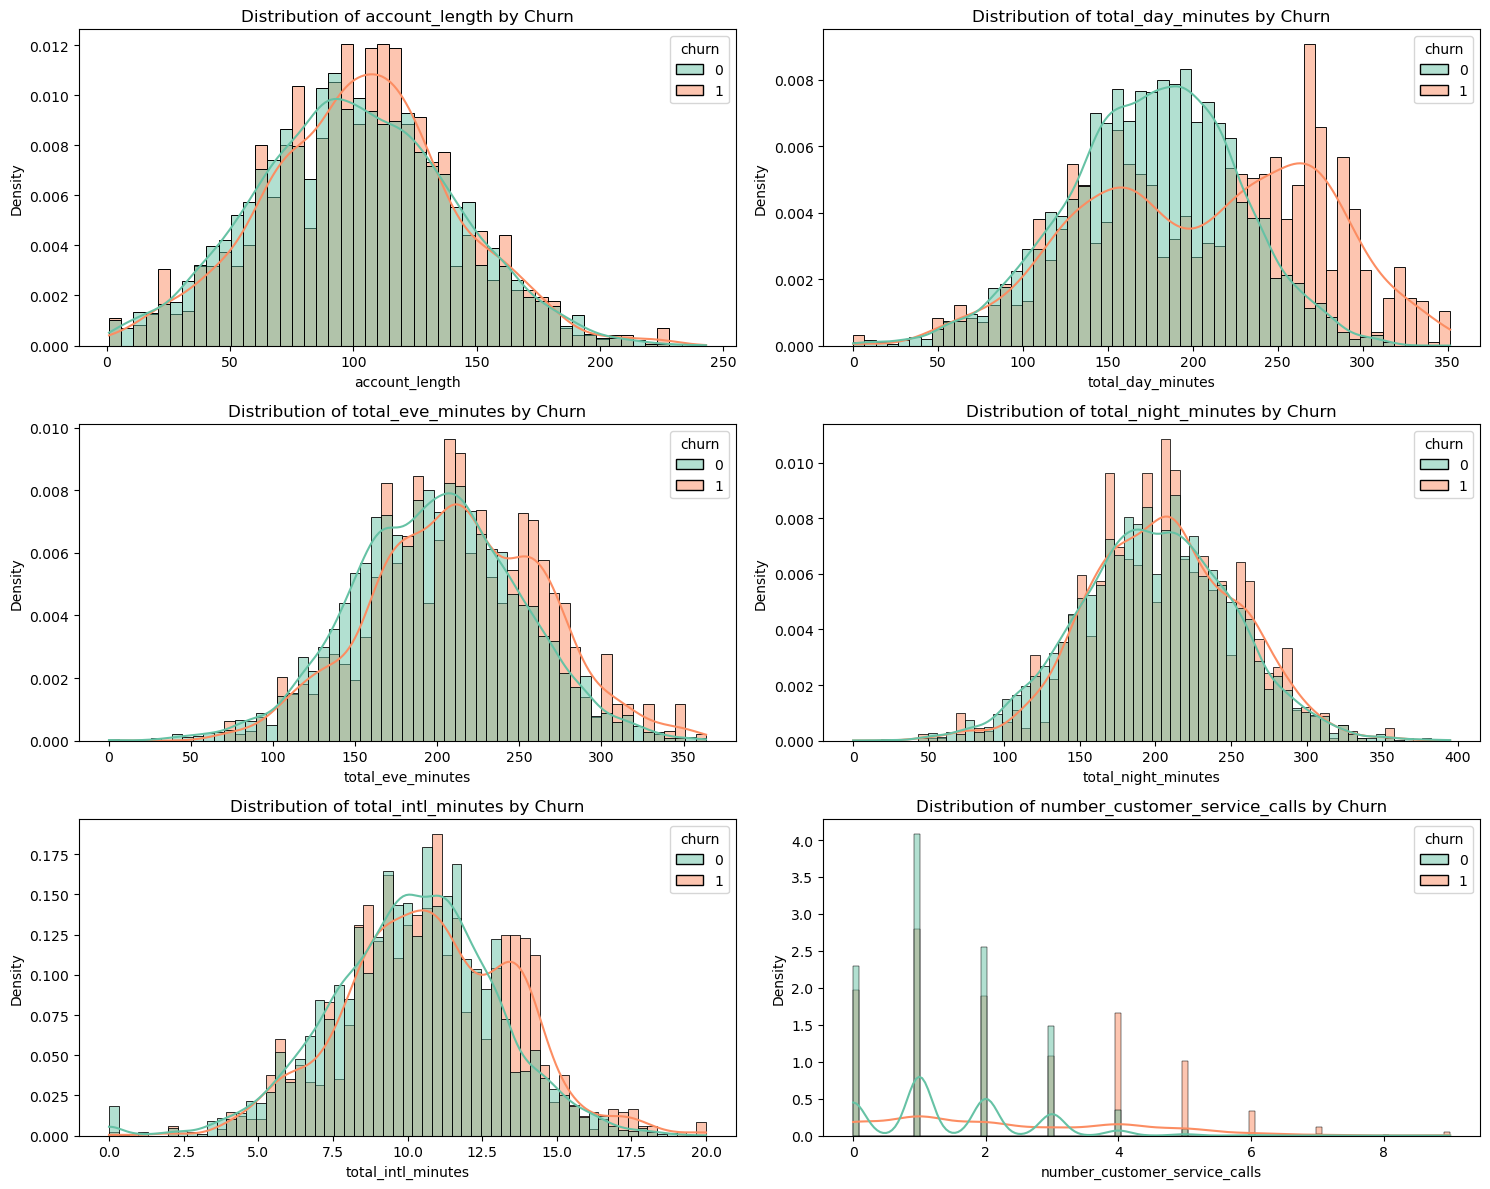

In [77]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=eda_data, x=feature, hue="churn", kde=True, stat="density", common_norm=False, palette="Set2")
    plt.title(f"Distribution of {feature} by Churn")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


__PLOT THE RELATIONSHIP BETWEEN CATEGORICAL FEATURES AND CHURN__

In [ ]:
categorical_features = ["international_plan", "voice_mail_plan"]

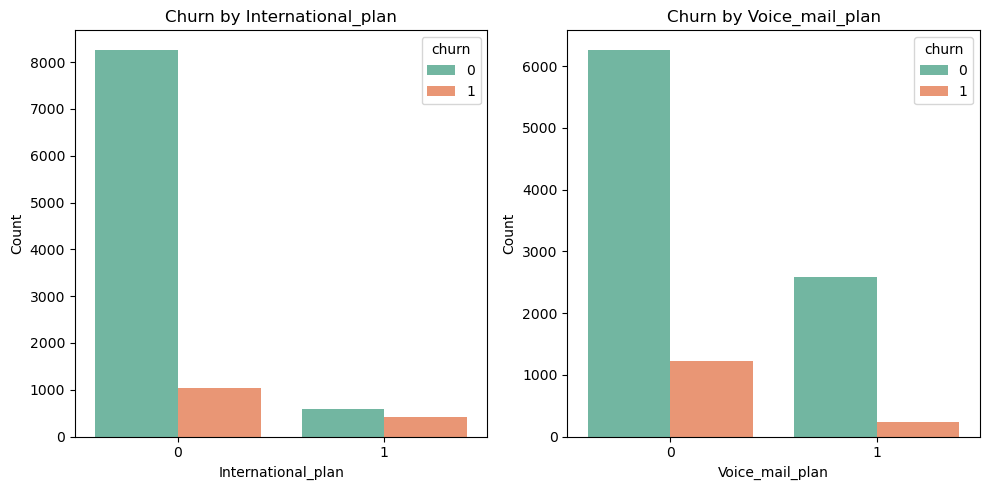

In [78]:
plt.figure(figsize=(10, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=eda_data, x=feature, hue="churn", palette="Set2")
    plt.title(f"Churn by {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

__MODEL TRAINING AND EVALUATION PROCESSES__ 

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [122]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    f1_score)

In [84]:
model_results = {}

__LIST OF MODEL TO TRAIN__

In [94]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()}

__TRAIN AND EVALUATE EACH MODELS__ 

In [111]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    

__PREDICATION__ 

In [113]:
  y_pred = model.predict(X_test_scaled)

__COMPUTING THE METRICS__

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

__STORING THE RESULTS__

In [115]:
model_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "F1-Score": f1 }

__CONVERT RESULT IN TO A DATAFRAME FOR COMPARISON__ 

In [102]:
results_df = pd.DataFrame(model_results).T
results_df.sort_values(by="F1-Score", ascending=False)

,Accuracy,Precision,F1-Score
Random Forest,0.996123,1.000000,0.985836
Gradient Boosting,0.965103,0.958904,0.861538
SVM,0.930206,0.912037,0.686411
KNN,0.898410,0.724299,0.541958
Logistic Regression,0.862350,0.508982,0.323810


__CONCLUSION__ 

__THIS PROJECT SUCCESFULLY IMPLEMENTED MACHINE LEARNING MODELS TO PREDICT CUSTOMER CHURN USING A DATASET CONTAINING VARIOUS CUSTOMER FEATURES.ALL MODELS WERE TRAINED AND EVALUATED BASED ON ACCURACY, PRECISION AND F1 SCORE.THE MODEL WITH THE HIGHEST F1 SCORE WAS SELECTED AS THE BEST PREDICTOR THAT IS RANDOM FOREST MODEL.__